## Problem statement 
Develop models to predict stock price

#### Import Libraries and Dataset

In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [2]:
stock_price_df= pd.read_csv('/content/drive/MyDrive/Python+for+Financial+Analysis+Package/Part 3. AI and ML in Finance/stock.csv')

In [3]:
stock_vol_df=pd.read_csv('/content/drive/MyDrive/Python+for+Financial+Analysis+Package/Part 3. AI and ML in Finance/stock_volume.csv')

In [4]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df.head()

Date       AAPL         BA  ...       TSLA        GOOG        sp500
0  2012-01-12  60.198570  75.510002  ...  28.250000  313.644379  1295.500000
1  2012-01-13  59.972858  74.599998  ...  22.790001  311.328064  1289.089966
2  2012-01-17  60.671429  75.239998  ...  26.600000  313.116364  1293.670044
3  2012-01-18  61.301430  75.059998  ...  26.809999  315.273285  1308.040039
4  2012-01-19  61.107143  75.559998  ...  26.760000  318.590851  1314.500000

[5 rows x 10 columns]

In [5]:
# Sort the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df.head()

Date      AAPL       BA  ...     TSLA      GOOG       sp500
0  2012-01-12  53146800  3934500  ...   729300   3764400  4019890000
1  2012-01-13  56505400  4641100  ...  5500400   4631800  3692370000
2  2012-01-17  60724300  3700100  ...  4651600   3832800  4010490000
3  2012-01-18  69197800  4189500  ...  1260200   5544000  4096160000
4  2012-01-19  65434600  5397300  ...  1246300  12657800  4465890000

[5 rows x 10 columns]

In [6]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [7]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [8]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [9]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [10]:
stock_vol_df.describe()

AAPL            BA  ...          GOOG         sp500
count  2.159000e+03  2.159000e+03  ...  2.159000e+03  2.159000e+03
mean   5.820332e+07  6.419916e+06  ...  2.498238e+06  3.680732e+09
std    4.568141e+07  9.711873e+06  ...  1.928407e+06  8.622717e+08
min    1.136200e+07  7.889000e+05  ...  7.900000e+03  1.248960e+09
25%    2.769930e+07  3.031850e+06  ...  1.325400e+06  3.211890e+09
50%    4.209420e+07  3.991000e+06  ...  1.813900e+06  3.526890e+09
75%    7.182480e+07  5.325900e+06  ...  3.245350e+06  3.933290e+09
max    3.765300e+08  1.032128e+08  ...  2.497790e+07  9.044690e+09

[8 rows x 9 columns]

In [11]:
stock_price_df.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

#### Visualization

In [12]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [13]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [14]:
# plot interactive chart for stocks data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

In [15]:
# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(stock_vol_df), 'Normalized Volume')

### Prepare data for training the models

In [16]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [17]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

Date        Close      Volume
0     2012-01-12  1295.500000  4019890000
1     2012-01-13  1289.089966  3692370000
2     2012-01-17  1293.670044  4010490000
3     2012-01-18  1308.040039  4096160000
4     2012-01-19  1314.500000  4465890000
...          ...          ...         ...
2154  2020-08-05  3327.770020  4732220000
2155  2020-08-06  3349.159912  4267490000
2156  2020-08-07  3351.280029  4104860000
2157  2020-08-10  3360.469971  4318570000
2158  2020-08-11  3333.689941  5087650000

[2159 rows x 3 columns]

In [18]:
# Function to return the input/output (target) data for AI/ML Model
# Target stock price today will be tomorrow's price 
# 1 day window and Create a column containing the prices for the next 1 days and return new dataset
def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)
  return data

In [19]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df.head()

Date        Close      Volume       Target
0  2012-01-12  1295.500000  4019890000  1289.089966
1  2012-01-13  1289.089966  3692370000  1293.670044
2  2012-01-17  1293.670044  4010490000  1308.040039
3  2012-01-18  1308.040039  4096160000  1314.500000
4  2012-01-19  1314.500000  4465890000  1315.380005

In [20]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

Date        Close      Volume       Target
0     2012-01-12  1295.500000  4019890000  1289.089966
1     2012-01-13  1289.089966  3692370000  1293.670044
2     2012-01-17  1293.670044  4010490000  1308.040039
3     2012-01-18  1308.040039  4096160000  1314.500000
4     2012-01-19  1314.500000  4465890000  1315.380005
...          ...          ...         ...          ...
2153  2020-08-04  3306.510010  4621670000  3327.770020
2154  2020-08-05  3327.770020  4732220000  3349.159912
2155  2020-08-06  3349.159912  4267490000  3351.280029
2156  2020-08-07  3351.280029  4104860000  3360.469971
2157  2020-08-10  3360.469971  4318570000  3333.689941

[2158 rows x 4 columns]

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [22]:
price_volume_target_scaled_df

array([[0.00828228, 0.35544202, 0.00524163],
       [0.00524163, 0.31342927, 0.00741423],
       [0.00741423, 0.35423623, 0.01423076],
       ...,
       [0.98245348, 0.38720299, 0.98345918],
       [0.98345918, 0.36634157, 0.9878185 ],
       [0.9878185 , 0.3937553 , 0.97511517]])

In [23]:
price_volume_target_scaled_df.shape

(2158, 3)

In [24]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [25]:
X.shape

(2158, 2)

In [26]:
y.shape

(2158, 1)

In [27]:
# Spliting the data this way, since order is important in time-series
# Note: Not used train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [28]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [29]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

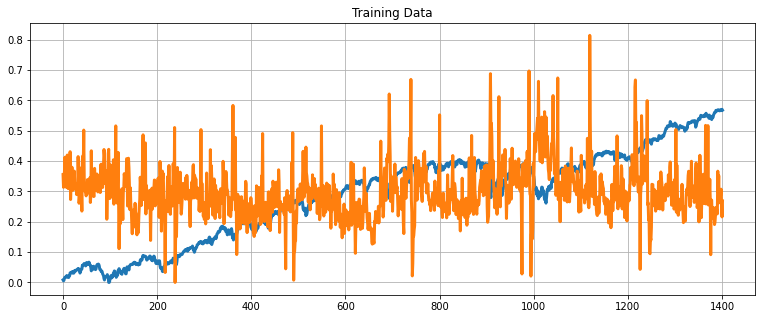

In [30]:
# Data Plotting 
plt.figure(figsize = (13, 5))
plt.plot(X_train, linewidth = 3)
plt.title('Training Data')
plt.grid()

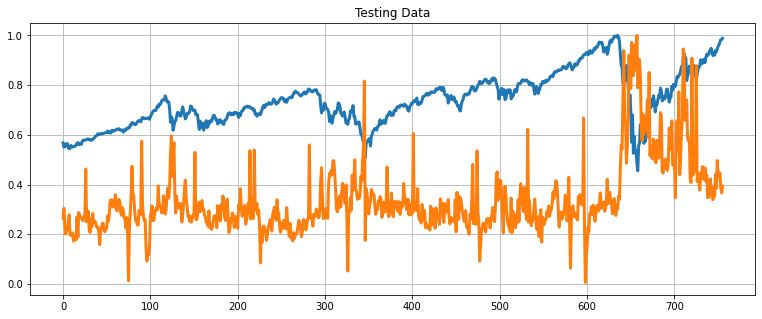

In [31]:
plt.figure(figsize = (13, 5))
plt.plot(X_test, linewidth = 3)
plt.title('Testing Data')
plt.grid()

#### Build Ridge Regression model 

In [32]:
from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [33]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9513167837265529


In [34]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.01766673],
       [0.01461495],
       [0.01682302],
       ...,
       [0.96114394],
       [0.96206464],
       [0.9663562 ]])

In [35]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [36]:
len(Predicted)

2158

In [37]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [38]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

Date
0     2012-01-12
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
...          ...
2153  2020-08-04
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10

[2158 rows x 1 columns]

In [39]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

Date     Close
0     2012-01-12  0.008282
1     2012-01-13  0.005242
2     2012-01-17  0.007414
3     2012-01-18  0.014231
4     2012-01-19  0.017295
...          ...       ...
2153  2020-08-04  0.962222
2154  2020-08-05  0.972307
2155  2020-08-06  0.982453
2156  2020-08-07  0.983459
2157  2020-08-10  0.987819

[2158 rows x 2 columns]

In [40]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

Date     Close  Prediction
0     2012-01-12  0.008282    0.017667
1     2012-01-13  0.005242    0.014615
2     2012-01-17  0.007414    0.016823
3     2012-01-18  0.014231    0.023452
4     2012-01-19  0.017295    0.026541
...          ...       ...         ...
2153  2020-08-04  0.962222    0.941668
2154  2020-08-05  0.972307    0.951470
2155  2020-08-06  0.982453    0.961144
2156  2020-08-07  0.983459    0.962065
2157  2020-08-10  0.987819    0.966356

[2158 rows x 3 columns]

In [41]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

In [42]:
#Experiment with various regularization value for alpha
from sklearn.linear_model import Ridge
regression_model = Ridge(alpha=2)
regression_model.fit(X_train, y_train)

Ridge(alpha=2)

In [43]:
# Test the model and calculate its accuracy. (accuaracy decreased with alpha =2)
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.901325398081162


In [44]:
# if tomorrow's closing price and volume
arr= np.array([[0.987612, 0.3937553]])

In [45]:
arr

array([[0.987612 , 0.3937553]])

In [46]:
regression_model.predict(arr)

array([[0.94597764]])

In [47]:
## Train LSTM model

In [48]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

Date        Close      Volume
0     2012-01-12  1295.500000  4019890000
1     2012-01-13  1289.089966  3692370000
2     2012-01-17  1293.670044  4010490000
3     2012-01-18  1308.040039  4096160000
4     2012-01-19  1314.500000  4465890000
...          ...          ...         ...
2154  2020-08-05  3327.770020  4732220000
2155  2020-08-06  3349.159912  4267490000
2156  2020-08-07  3351.280029  4104860000
2157  2020-08-10  3360.469971  4318570000
2158  2020-08-11  3333.689941  5087650000

[2159 rows x 3 columns]

In [49]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [50]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [51]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [52]:
X

[array([0.00828228]),
 array([0.00524163]),
 array([0.00741423]),
 array([0.01423076]),
 array([0.0172951]),
 array([0.01771253]),
 array([0.01800663]),
 array([0.01736626]),
 array([0.02277871]),
 array([0.01915935]),
 array([0.01816315]),
 array([0.01658831]),
 array([0.0163037]),
 array([0.02184418]),
 array([0.02253203]),
 array([0.03171561]),
 array([0.03144519]),
 array([0.03273549]),
 array([0.03411583]),
 array([0.0350598]),
 array([0.03064355]),
 array([0.03497445]),
 array([0.034372]),
 array([0.03092341]),
 array([0.03794869]),
 array([0.03946186]),
 array([0.03992672]),
 array([0.03776843]),
 array([0.04051967]),
 array([0.04160122]),
 array([0.04247878]),
 array([0.04465612]),
 array([0.04157279]),
 array([0.04556211]),
 array([0.04344649]),
 array([0.04093236]),
 array([0.03098508]),
 array([0.03538239]),
 array([0.04168189]),
 array([0.04403469]),
 array([0.04413903]),
 array([0.05593158]),
 array([0.05513944]),
 array([0.05908607]),
 array([0.05983085]),
 array([0.06247

In [53]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [54]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [55]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [56]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [57]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 8s 49ms/step - loss: 0.0323 - val_loss: 0.0577
Epoch 2/20
38/38 [==============================] - 1s 13ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 3/20
38/38 [==============================] - 1s 14ms/step - loss: 5.7748e-04 - val_loss: 2.8080e-04
Epoch 4/20
38/38 [==============================] - 1s 14ms/step - loss: 3.7276e-04 - val_loss: 4.7045e-04
Epoch 5/20
38/38 [==============================] - 1s 14ms/step - loss: 3.7499e-04 - val_loss: 2.4044e-04
Epoch 6/20
38/38 [==============================] - 1s 14ms/step - loss: 3.4106e-04 - val_loss: 4.5799e-05
Epoch 7/20
38/38 [==============================] - 1s 14ms/step - loss: 3.0378e-04 - val_loss: 5.7736e-05
Epoch 8/20
38/38 [==============================] - 1s 14ms/step - loss: 2.7544e-04 - val_loss: 4.6099e-05
Epoch 9/20
38/38 [==============================] - 1s 14ms/step - loss: 2.6563e-04 - val_loss: 3.9036e-05
Epoch 10/20
38/38 [==============================] - 

In [58]:
# Make prediction
predicted = model.predict(X)